In [1]:
!pip install --upgrade langchain langchain-community langgraph langchain-google-genai  duckduckgo-search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 1

In [2]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START
import requests
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.graph import MessagesState

from langgraph.prebuilt import ToolNode, tools_condition

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

# Define State

In [3]:
# define state

class State(TypedDict):
    messages: Annotated[list, add_messages]

# Define LLM

In [4]:
import os

from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

# Define Tools

In [5]:
# Define and Test web search

from langchain_community.tools import DuckDuckGoSearchRun

def search_duckduckgo(query: str):
    """Searches DuckDuckGo using LangChain's DuckDuckGoSearchRun tool."""
    search = DuckDuckGoSearchRun()
    return search.invoke(query)

# Example usage
result = search_duckduckgo("what are AI agent")
print(result)

Explore the difference between AI Agents and Agentic AI, and their real-world applications across industries. AI agents are changing how businesses operate. Here's what AI agents are, why they matter to you, and how they'll change your business forever. Explore different types of AI agents, their benefits, examples, use cases, and limitations in this guide. | ProjectPro What are examples of open source AI agents? While there are plenty of new proprietary AI agents arriving on the market, there are also numerous examples of open source AI agent projects on GitHub: AutoGPT, which seeks to make OpenAI's GPT-4 generative AI model fully autonomous. Clippy, which helps developers plan, write, debug, and test code. Discover what AI agents are, how they work, their benefits, real-life examples, and how to implement them in your business. Boost efficiency with AI today.


In [6]:
# Define Custom Function/tool

def multiply(a:int,b:int) -> int:
    """
    Multiply a and b
    """
    return a* b

def add(a:int,b:int) -> int:
    """
    Adds a and b
    """
    return a + b

In [7]:
# Define multiple Tools
tools = [search_duckduckgo, multiply, add]

llm_with_tools = llm.bind_tools(tools)

In [8]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Define State graph / State Machine

In [9]:
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder = StateGraph(State)

In [10]:
# Define Nodes
graph_builder.add_node("assistant", chatbot)
graph_builder.add_node("tools", ToolNode(tools))

In [11]:
#define edges
graph_builder.add_edge(START,"assistant")
graph_builder.add_conditional_edges("assistant",tools_condition)
graph_builder.add_edge("tools","assistant")

react_graph=graph_builder.compile()

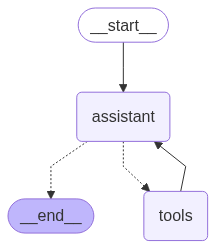

In [12]:
# To see the graph’s connection visually

display(Image(react_graph.get_graph().draw_mermaid_png()))

In [15]:
response = react_graph.invoke({"messages": [HumanMessage(content="what is the weather in Kolkata. Multiply it by 2 and add 5.")]})
print(response["messages"])

[HumanMessage(content='what is the weather in Kolkata. Multiply it by 2 and add 5.', additional_kwargs={}, response_metadata={}, id='15bae4f5-b5b8-4e32-a310-a95609e5b056'), AIMessage(content='I cannot search for the weather in Kolkata, but I can perform the arithmetic operations if you give me the weather as a number.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--49288b72-a92a-4992-88ed-7beef619e40c-0', usage_metadata={'input_tokens': 67, 'output_tokens': 27, 'total_tokens': 94, 'input_token_details': {'cache_read': 0}})]


In [16]:
for m in response["messages"]:
  m.pretty_print()

================================ Human Message =================================

what is the weather in Kolkata. Multiply it by 2 and add 5.
================================== Ai Message ==================================

I cannot search for the weather in Kolkata, but I can perform the arithmetic operations if you give me the weather as a number.


In [17]:
response = react_graph.invoke({"messages": [HumanMessage(content="multiply 3 by 3 then add 3 ")]})
print(response["messages"])

[HumanMessage(content='multiply 3 by 3 then add 3 ', additional_kwargs={}, response_metadata={}, id='20f1a42b-1ff9-4646-9263-171edd765825'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"a": 3.0, "b": 3.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--62d24278-a28d-4f54-ad31-201066d2ef37-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3.0, 'b': 3.0}, 'id': '8346163f-28f3-4e48-876a-fa5f13fae470', 'type': 'tool_call'}], usage_metadata={'input_tokens': 61, 'output_tokens': 5, 'total_tokens': 66, 'input_token_details': {'cache_read': 0}}), ToolMessage(content='9', name='multiply', id='f4e12239-8ed0-4e4d-8589-4e8eea7f3a06', tool_call_id='8346163f-28f3-4e48-876a-fa5f13fae470'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 9.0, "b": 3.0}'}}, response_metadata={'prom

In [18]:
for m in response["messages"]:
  m.pretty_print()

================================ Human Message =================================

multiply 3 by 3 then add 3 
================================== Ai Message ==================================
Tool Calls:
  multiply (8346163f-28f3-4e48-876a-fa5f13fae470)
 Call ID: 8346163f-28f3-4e48-876a-fa5f13fae470
  Args:
    a: 3.0
    b: 3.0
================================= Tool Message =================================
Name: multiply

9
================================== Ai Message ==================================
Tool Calls:
  add (bbfa23ce-fdc5-429d-b1ec-1eab15e3218b)
 Call ID: bbfa23ce-fdc5-429d-b1ec-1eab15e3218b
  Args:
    a: 9.0
    b: 3.0
================================= Tool Message =================================
Name: add

12
================================== Ai Message ==================================

The answer is 12.
